In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
pd.options.display.max_colwidth = 200
%matplotlib inline

In [2]:
# building a corpus of documents
corpus = ['The sky is blue and beautiful.',
'Love this blue and beautiful sky!',
'The quick brown fox jumps over the lazy dog.',
"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",
'I love green eggs, ham, sausages and bacon!',
'The brown fox is quick and the blue dog is lazy!',
'The sky is very blue and the sky is very beautiful today',
'The dog is lazy but the brown fox is quick!'
]

In [3]:
labels = ['weather', 'weather', 'animals', 'food', 'food', 'animals',
'weather', 'animals']

In [4]:
corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food
4,"I love green eggs, ham, sausages and bacon!",food
5,The brown fox is quick and the blue dog is lazy!,animals
6,The sky is very blue and the sky is very beautiful today,weather
7,The dog is lazy but the brown fox is quick!,animals


# Preprocessing Our Text Corpus
There can be multiple ways of cleaning and preprocessing textual data. In the following
points, we highlight some of the most important ones that are used heavily in Natural
Language Processing (NLP) pipelines.

- ### Removing tags:
Our text often contains unnecessary content like HTML tags, which do not add much value when analyzing text. The BeautifulSoup library does an excellent job in providing necessary functions for this.

- ### Removing accented characters:
In any text corpus, especially if you are dealing with the English language, you might be dealing with accented characters/letters. Hence, you need to make sure that these characters are converted and standardized into ASCII characters. A simple example is converting é to e.

- ### Expanding contractions:
In the English language, contractions are basically shortened versions of words or syllables, created by removing specific letters and sounds. Examples include do not to don’t and I would to I’d. Converting each contraction to its expanded, original form often helps with text standardization.

- ### Removing special characters:
Special characters and symbols that are usually non alphanumeric characters often add to the extra noise in unstructured text. More often than not, simple regular expressions (regexes) can be used to achieve this.

- ### Stemming and lemmatization:
Word stems are the base form of possible words that can be created by attaching affixes like prefixes and suffixes to the stem to create new words. This is known as inflection. The reverse process of obtaining the base form of a word is known as stemming. A simple example are the words watches, watching, and watched. They have the word root stem watch as the base form. Lemmatization is very similar to stemming, where we remove word affixes to get to the base form of a word. However, the base form in this case is known as the root word but not the root stem. The difference being that the root word is always a lexicographically correct word (present in the dictionary) but the root stem may not always be correct.

- ### Removing stopwords:
Words that have little or no significance, especially when constructing meaningful features from text, are known as stopwords. These are usually words that end up having the maximum frequency if you do a simple term or word frequency in a corpus. Words like “a,” “an,” “the,” and so on are considered to be stopwords. There is no universal stopword list, but we use a standard English language stopwords list from NLTK. You can also add your own domain specific stopwords as needed.

In [5]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

In [6]:
def normalize_document(doc):
    # lowercase and remove special characters\whitespace
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

In [7]:
normalize_corpus = np.vectorize(normalize_document)

In [8]:
norm_corpus = normalize_corpus(corpus)

In [9]:
print(norm_corpus)

['sky blue beautiful' 'love blue beautiful sky'
 'quick brown fox jumps lazy dog'
 'kings breakfast sausages ham bacon eggs toast beans'
 'love green eggs ham sausages bacon' 'brown fox quick blue dog lazy'
 'sky blue sky beautiful today' 'dog lazy brown fox quick']


In [10]:
cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix

<8x20 sparse matrix of type '<class 'numpy.int64'>'
	with 42 stored elements in Compressed Sparse Row format>

In [11]:
# view non-zero feature positions in the sparse matrix
print(cv_matrix)

  (0, 17)	1
  (0, 3)	1
  (0, 2)	1
  (1, 17)	1
  (1, 3)	1
  (1, 2)	1
  (1, 14)	1
  (2, 15)	1
  (2, 5)	1
  (2, 8)	1
  (2, 11)	1
  (2, 13)	1
  (2, 6)	1
  (3, 12)	1
  (3, 4)	1
  (3, 16)	1
  (3, 10)	1
  (3, 0)	1
  (3, 7)	1
  (3, 18)	1
  (3, 1)	1
  (4, 14)	1
  (4, 16)	1
  (4, 10)	1
  (4, 0)	1
  (4, 7)	1
  (4, 9)	1
  (5, 3)	1
  (5, 15)	1
  (5, 5)	1
  (5, 8)	1
  (5, 13)	1
  (5, 6)	1
  (6, 17)	2
  (6, 3)	1
  (6, 2)	1
  (6, 19)	1
  (7, 15)	1
  (7, 5)	1
  (7, 8)	1
  (7, 13)	1
  (7, 6)	1


The feature matrix is traditionally represented as a sparse matrix since the number
of features increases phenomenally with each document considering each distinct word
becomes a feature. The preceding output tells us the total count for each (x, y) pair. Here,
x represents a document and y represents a specific word/feature and the value is the
number of times y occurs in x. We can leverage the following code to view the output in a
dense matrix representation.

In [12]:
# view dense representation
# warning might give a memory error if data is too big
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1],
       [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0]])

In [13]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0
3,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0
5,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0
6,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1
7,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0


In [14]:
# you can set the n-gram range to 1,2 to get unigrams as well as bigrams
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(norm_corpus)

In [15]:
bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
pd.DataFrame(bv_matrix, columns=vocab)

,bacon eggs,beautiful sky,beautiful today,blue beautiful,blue dog,blue sky,breakfast sausages,brown fox,dog lazy,eggs ham,...,lazy dog,love blue,love green,quick blue,quick brown,sausages bacon,sausages ham,sky beautiful,sky blue,toast beans
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
7,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
tt = TfidfTransformer(norm='l2', use_idf=True)
tt_matrix = tt.fit_transform(cv_matrix)

In [17]:
tt_matrix = tt_matrix.toarray()
vocab = cv.get_feature_names()
pd.DataFrame(np.round(tt_matrix, 2), columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


# TfidfVectorizer

In [18]:
tv = TfidfVectorizer(min_df=0., max_df=1., norm='l2',
use_idf=True, smooth_idf=True)

In [19]:
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

In [20]:
vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


In [21]:
vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.00,0.00,0.60,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0
1,0.00,0.00,0.49,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.49,0.00,0.0
2,0.00,0.00,0.00,0.00,0.00,0.38,0.38,0.00,0.38,0.00,0.00,0.53,0.00,0.38,0.00,0.38,0.00,0.00,0.00,0.0
3,0.32,0.38,0.00,0.00,0.38,0.00,0.00,0.32,0.00,0.00,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.00,0.38,0.0
4,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.47,0.39,0.00,0.00,0.00,0.39,0.00,0.39,0.00,0.00,0.0
5,0.00,0.00,0.00,0.37,0.00,0.42,0.42,0.00,0.42,0.00,0.00,0.00,0.00,0.42,0.00,0.42,0.00,0.00,0.00,0.0
6,0.00,0.00,0.36,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.5
7,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.00,0.45,0.00,0.00,0.00,0.00,0.45,0.00,0.45,0.00,0.00,0.00,0.0


In [22]:
# get unique words as feature names
unique_words = list(set([word for doc in [doc.split() for doc in norm_corpus]
for word in doc]))

In [23]:
def_feature_dict = {w: 0 for w in unique_words}
print('Feature Names:', unique_words)
print()
print('Default Feature Dict:', def_feature_dict)

Feature Names: ['lazy', 'dog', 'ham', 'breakfast', 'sausages', 'bacon', 'jumps', 'beautiful', 'beans', 'brown', 'fox', 'quick', 'eggs', 'today', 'sky', 'kings', 'toast', 'green', 'love', 'blue']

Default Feature Dict: {'lazy': 0, 'dog': 0, 'ham': 0, 'breakfast': 0, 'sausages': 0, 'bacon': 0, 'jumps': 0, 'beautiful': 0, 'beans': 0, 'brown': 0, 'fox': 0, 'quick': 0, 'eggs': 0, 'today': 0, 'sky': 0, 'kings': 0, 'toast': 0, 'green': 0, 'love': 0, 'blue': 0}


In [24]:
# build bag of words features for each document - term frequencies
bow_features = []
for doc in norm_corpus:
    bow_feature_doc = Counter(doc.split())
    all_features = Counter(def_feature_dict)
    bow_feature_doc.update(all_features)
    bow_features.append(bow_feature_doc)
bow_features = pd.DataFrame(bow_features)
bow_features

,sky,blue,beautiful,lazy,dog,ham,breakfast,sausages,bacon,jumps,beans,brown,fox,quick,eggs,today,kings,toast,green,love
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0
3,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,0,1,1,0,0
4,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,1
5,0,1,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0
6,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0


In [25]:
import scipy.sparse as sp
feature_names = list(bow_features.columns)
# build the document frequency matrix
df = np.diff(sp.csc_matrix(bow_features, copy=True).indptr)
df = 1 + df # adding 1 to smoothen idf later
# show smoothened document frequencies
pd.DataFrame([df], columns=feature_names)

,sky,blue,beautiful,lazy,dog,ham,breakfast,sausages,bacon,jumps,beans,brown,fox,quick,eggs,today,kings,toast,green,love
0,4,5,4,4,4,3,2,3,3,2,2,4,4,4,3,2,2,2,2,3


In [26]:
# compute inverse document frequencies
total_docs = 1 + len(norm_corpus)
idf = 1.0 + np.log(float(total_docs) / df)
# show smoothened idfs
pd.DataFrame([np.round(idf, 2)], columns=feature_names)

,sky,blue,beautiful,lazy,dog,ham,breakfast,sausages,bacon,jumps,beans,brown,fox,quick,eggs,today,kings,toast,green,love
0,1.81,1.59,1.81,1.81,1.81,2.1,2.5,2.1,2.1,2.5,2.5,1.81,1.81,1.81,2.1,2.5,2.5,2.5,2.5,2.1


In [27]:
# compute idf diagonal matrix
total_features = bow_features.shape[1]
idf_diag = sp.spdiags(idf, diags=0, m=total_features, n=total_features)
idf_dense = idf_diag.todense()
# print the idf diagonal matrix
pd.DataFrame(np.round(idf_dense, 2))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.81,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00,1.59,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00,0.00,1.81,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.00,0.00,1.81,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00,0.00,0.00,0.00,1.81,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
5,0.00,0.00,0.00,0.00,0.00,2.1,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
6,0.00,0.00,0.00,0.00,0.00,0.0,2.5,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
7,0.00,0.00,0.00,0.00,0.00,0.0,0.0,2.1,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
8,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,2.1,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
9,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,2.5,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# compute tfidf feature matrix
tf = np.array(bow_features, dtype='float64')
tfidf = tf * idf
# view raw tfidf feature matrix
pd.DataFrame(np.round(tfidf, 2), columns=feature_names)

,sky,blue,beautiful,lazy,dog,ham,breakfast,sausages,bacon,jumps,beans,brown,fox,quick,eggs,today,kings,toast,green,love
0,1.81,1.59,1.81,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,1.81,1.59,1.81,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,2.1
2,0.00,0.00,0.00,1.81,1.81,0.0,0.0,0.0,0.0,2.5,0.0,1.81,1.81,1.81,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00,0.00,0.00,0.00,0.00,2.1,2.5,2.1,2.1,0.0,2.5,0.00,0.00,0.00,2.1,0.0,2.5,2.5,0.0,0.0
4,0.00,0.00,0.00,0.00,0.00,2.1,0.0,2.1,2.1,0.0,0.0,0.00,0.00,0.00,2.1,0.0,0.0,0.0,2.5,2.1
5,0.00,1.59,0.00,1.81,1.81,0.0,0.0,0.0,0.0,0.0,0.0,1.81,1.81,1.81,0.0,0.0,0.0,0.0,0.0,0.0
6,3.62,1.59,1.81,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,2.5,0.0,0.0,0.0,0.0
7,0.00,0.00,0.00,1.81,1.81,0.0,0.0,0.0,0.0,0.0,0.0,1.81,1.81,1.81,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
from numpy.linalg import norm
# compute L2 norms
norms = norm(tfidf, axis=1)
# print norms for each document
print (np.round(norms, 3))

[3.013 3.672 4.761 6.534 5.319 4.35  5.019 4.049]


In [30]:
# compute normalized tfidf
norm_tfidf = tfidf / norms[:, None]
# show final tfidf feature matrix
pd.DataFrame(np.round(norm_tfidf, 2), columns=feature_names)

,sky,blue,beautiful,lazy,dog,ham,breakfast,sausages,bacon,jumps,beans,brown,fox,quick,eggs,today,kings,toast,green,love
0,0.60,0.53,0.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
1,0.49,0.43,0.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.57
2,0.00,0.00,0.00,0.38,0.38,0.00,0.00,0.00,0.00,0.53,0.00,0.38,0.38,0.38,0.00,0.0,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.32,0.38,0.32,0.32,0.00,0.38,0.00,0.00,0.00,0.32,0.0,0.38,0.38,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.39,0.00,0.39,0.39,0.00,0.00,0.00,0.00,0.00,0.39,0.0,0.00,0.00,0.47,0.39
5,0.00,0.37,0.00,0.42,0.42,0.00,0.00,0.00,0.00,0.00,0.00,0.42,0.42,0.42,0.00,0.0,0.00,0.00,0.00,0.00
6,0.72,0.32,0.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.5,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.45,0.45,0.00,0.00,0.00,0.00,0.00,0.00,0.45,0.45,0.45,0.00,0.0,0.00,0.00,0.00,0.00


# Extracting Features for New Documents

In [31]:
new_doc = 'the sky is green today'
pd.DataFrame(np.round(tv.transform([new_doc]).toarray(), 2),
columns=tv.get_feature_names())

,bacon,beans,beautiful,blue,breakfast,brown,dog,eggs,fox,green,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.46,0.0,0.63


# Document Similarity

In [32]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7
0,1.000000,0.820599,0.000000,0.000000,0.000000,0.192353,0.817246,0.000000
1,0.820599,1.000000,0.000000,0.000000,0.225489,0.157845,0.670631,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.791821,0.000000,0.850516
3,0.000000,0.000000,0.000000,1.000000,0.506866,0.000000,0.000000,0.000000
4,0.000000,0.225489,0.000000,0.506866,1.000000,0.000000,0.000000,0.000000
5,0.192353,0.157845,0.791821,0.000000,0.000000,1.000000,0.115488,0.930989
6,0.817246,0.670631,0.000000,0.000000,0.000000,0.115488,1.000000,0.000000
7,0.000000,0.000000,0.850516,0.000000,0.000000,0.930989,0.000000,1.000000


# Document Clustering with Similarity Features

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(similarity_matrix, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2',
'Distance', 'Cluster Size'], dtype='object')

,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,2,7,0.253098,2
1,0,6,0.308539,2
2,5,8,0.386952,3
3,1,9,0.489845,3
4,3,4,0.732945,2
5,11,12,2.69565,5
6,10,13,3.45108,8


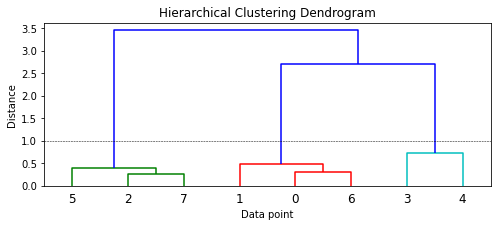

In [34]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5)

In [35]:
from scipy.cluster.hierarchy import fcluster
max_dist = 1.0
cluster_labels = fcluster(Z, max_dist, criterion='distance')
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,2
1,Love this blue and beautiful sky!,weather,2
2,The quick brown fox jumps over the lazy dog.,animals,1
3,"A king's breakfast has sausages, ham, bacon, eggs, toast and beans",food,3
4,"I love green eggs, ham, sausages and bacon!",food,3
5,The brown fox is quick and the blue dog is lazy!,animals,1
6,The sky is very blue and the sky is very beautiful today,weather,2
7,The dog is lazy but the brown fox is quick!,animals,1


In [36]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=3, max_iter=10000, random_state=0)
dt_matrix = lda.fit_transform(cv_matrix)
features = pd.DataFrame(dt_matrix, columns=['T1', 'T2', 'T3'])
features

,T1,T2,T3
0,0.832191,0.083480,0.084329
1,0.863554,0.069100,0.067346
2,0.047794,0.047776,0.904430
3,0.037243,0.925559,0.037198
4,0.049121,0.903076,0.047802
5,0.054902,0.047778,0.897321
6,0.888287,0.055697,0.056016
7,0.055704,0.055689,0.888607


In [37]:
tt_matrix = lda.components_
for topic_weights in tt_matrix:
    topic = [(token, weight) for token, weight in zip(vocab, topic_weights)]
    topic = sorted(topic, key=lambda x: -x[1])
    topic = [item for item in topic if item[1] > 0.6]
    print(topic)
    print()

[('sky', 4.3324394424701325), ('blue', 3.373774254787669), ('beautiful', 3.3323650509884386), ('today', 1.3325579855138987), ('love', 1.330415818217548)]

[('bacon', 2.33269586574902), ('eggs', 2.33269586574902), ('ham', 2.33269586574902), ('sausages', 2.33269586574902), ('love', 1.3354610533796558), ('beans', 1.3327735190105536), ('breakfast', 1.3327735190105536), ('kings', 1.3327735190105536), ('toast', 1.3327735190105536), ('green', 1.3325431515674175)]

[('brown', 3.3323473548404405), ('dog', 3.3323473548404405), ('fox', 3.3323473548404405), ('lazy', 3.3323473548404405), ('quick', 3.3323473548404405), ('jumps', 1.3324193772908193), ('blue', 1.2919423137963386)]

